# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [20]:
# Checking the number of mice.
mice = len(mouse_study_df['Mouse ID'].unique())
mice

249

In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ids = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_ids

array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
# duplicates_df = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates_df = mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Assuming you have a DataFrame called 'df' with the original data
# no_duplicates = mouse_study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
no_duplicates = mouse_study_df[mouse_study_df['Mouse ID'].isin(duplicate_ids) == False]
no_duplicates.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
# Checking the number of mice in the clean DataFrame.
mice_clean = len(no_duplicates['Mouse ID'].unique())
mice_clean

248

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
grouped_data = no_duplicates.groupby('Drug Regimen')

mean_volume = grouped_data['Tumor Volume (mm3)'].mean()

median_volume = grouped_data['Tumor Volume (mm3)'].median()

var_volume = grouped_data['Tumor Volume (mm3)'].var()

std_volume = grouped_data['Tumor Volume (mm3)'].std()

sem_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_volume,
    'Median Tumor Volume': median_volume,
    'Tumor Volume Variance': var_volume,
    'Tumor Volume Std. Dev.': std_volume,
    'Tumor Volume Std. Err.': sem_volume
})

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_statistics = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_statistics.rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume', 'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.', 'sem': 'Tumor Volume Std. Err.'}, inplace=True)

summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

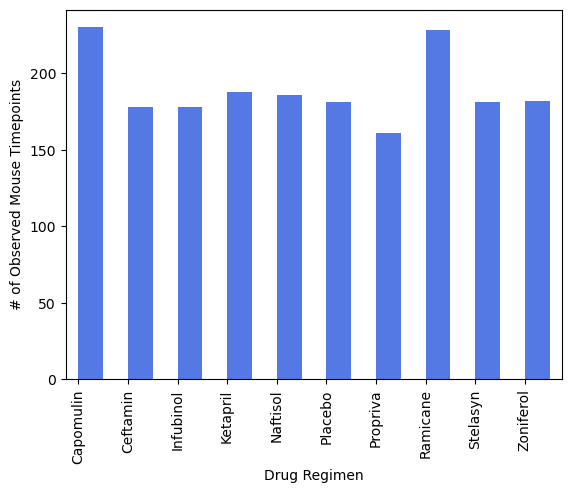

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Create a new DataFrame with the counts of observed mouse timepoints
mouse_count_per_regimen = mouse_study_df.groupby("Drug Regimen")["Mouse ID"].count()
count_df = pd.DataFrame({"Count": mouse_count_per_regimen})

# Use DataFrame.plot() to create the bar plot
ax = count_df.plot(kind="bar", color='royalblue', alpha=0.9, align="edge", legend=False)

# Set x-axis and y-axis labels
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("# of Observed Mouse Timepoints")

# Set x-tick labels and rotation
tick_locations = range(len(count_df))
plt.xticks(tick_locations, count_df.index, rotation="vertical")

# Show the plot
plt.show()

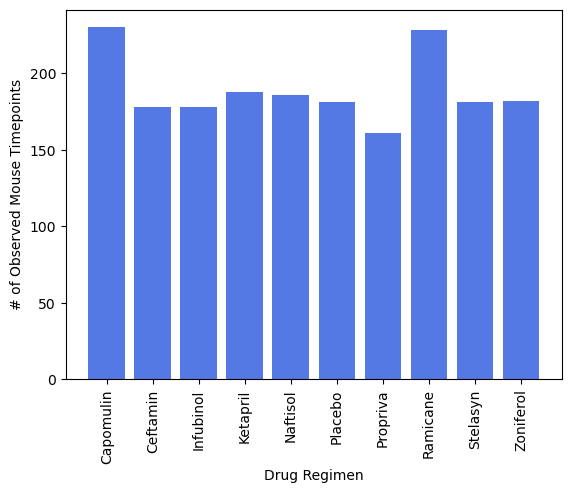

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_count_per_regimen = mouse_study_df.groupby("Drug Regimen")["Mouse ID"].count()

# Get unique drug regimens and their respective counts
unique_drug_regimens = mouse_count_per_regimen.index
count_per_regimen = mouse_count_per_regimen.values

# Create the x_axis using the unique drug regimens
x_axis = np.arange(len(unique_drug_regimens))

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.bar(x_axis, count_per_regimen, color='royalblue', alpha=0.9, align="center")
plt.xticks(tick_locations, unique_drug_regimens, rotation="vertical")

plt.show()

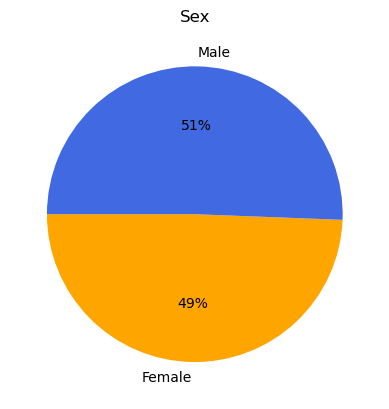

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group by "Sex" column and count the number of mice in each category
mouse_count_per_sex = mouse_study_df.groupby("Sex")["Mouse ID"].count()

# Set the colors, labels, sizes and where to explode the pie chart
colors = ['orange', 'royalblue']
labels = mouse_count_per_sex.index
sizes = mouse_count_per_sex.values
explode = (0, 0)

# Plot the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.0f%%', shadow=False, startangle=180)

# Set the title for the pie chart
plt.title('Sex')

plt.show()

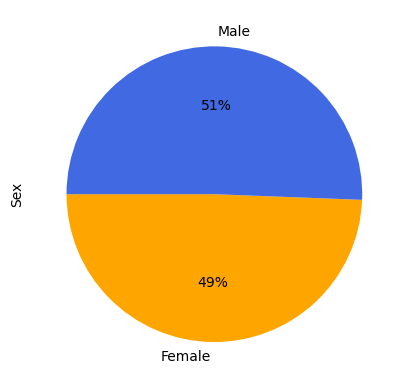

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group by "Sex" column and count the number of mice in each category
mouse_count_per_sex = mouse_study_df.groupby("Sex")["Mouse ID"].count()

# Use DataFrame.plot() to create the pie chart
ax = mouse_count_per_sex.plot(kind="pie", autopct='%1.0f%%', colors=['orange', 'royalblue'], startangle=180)

# Set the label for the pie chart
ax.set_ylabel("Sex")

# Show the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = mouse_study_df.groupby("Mouse ID")["Timepoint"].max().reset_index()


# Now the `final_tumor_volume_df` DataFrame contains the final tumor volume for each mouse across the specified treatment regimens.
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filtered_df = mouse_study_df[mouse_study_df["Drug Regimen"].isin(selected_regimens)]


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(max_timepoints, mouse_study_df, on=["Mouse ID", "Timepoint"], how="left")


final_tumor_volume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in selected_regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume_df.loc[final_tumor_volume_df["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate and print the IQR for each regimen
    quartiles = tumor_volumes.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    print(f"{regimen}")
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    if not outliers.empty:
        print("Potential Outliers:")
        print(outliers)
    else:
        print("No potential outliers.")
    print("------------------------------------")

Capomulin
No potential outliers.
------------------------------------
Ramicane
No potential outliers.
------------------------------------
Infubinol
Potential Outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
------------------------------------
Ceftamin
No potential outliers.
------------------------------------


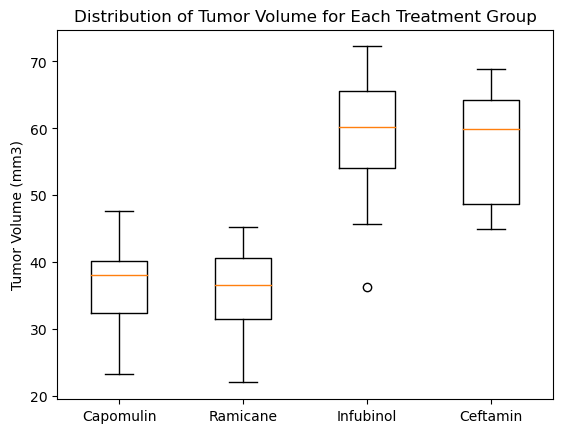

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=selected_regimens, notch=False, patch_artist=False)

plt.ylabel("Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume for Each Treatment Group")

plt.show()

## Line and Scatter Plots

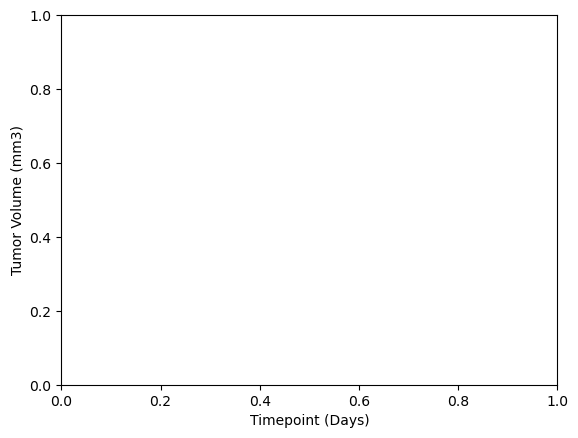

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# mouse_id = "i509"
# mouse_tumor_vol = mouse_study_df.loc[mouse_study_df["Mouse ID"] == mouse_id]

# # Get the timepoint data for the mouse


# # Plot the tumor volume vs. timepoint data
# plt.plot(timepoint_data, mouse_tumor_vol)


# plt.xlabel("Timepoint")
# plt.ylabel("Tumor Volume (mm3)")
# plt.title(f"Capomulin treatment of mouse i509")

# plt.show()





mouse_id = "l509"
# Get the tumor volume data for all mice treated with Capomulin
capomulin_data = mouse_study_df[mouse_study_df["Drug Regimen"] == "Capomulin"]
timepoint_data = mouse_study_df.loc[mouse_study_df["Mouse ID"] == mouse_id, "Timepoint"]

# # Get the mouse ID data for all mice
# mouse_id_data = mouse_study_df.loc[mouse_study_df["Drug Regimen"] == "Capomulin", "Mouse ID"]

# # Plot the tumor volume vs. timepoint data for each mouse
# for mouse_id in mouse_id_data:
#     tumor_vol_data_for_mouse = mouse_tumor_vol_data.loc[mouse_tumor_vol_data["Mouse ID"] == mouse_id]
#     timepoint_data_for_mouse = mouse_study_df.loc[mouse_study_df["Mouse ID"] == mouse_id, "Timepoint"]

#     # Convert the tumor volume data to a list of numbers
#     tumor_vol_data_for_mouse = tumor_vol_data_for_mouse.tolist()

#     # Plot the data
#     plt.plot(timepoint_data_for_mouse, tumor_vol_data_for_mouse)

# # Add a title to the plot
# plt.title("Capomulin treatment of mouse i509")

# Add labels to the x-axis and y-axis
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Show the plot
plt.show()



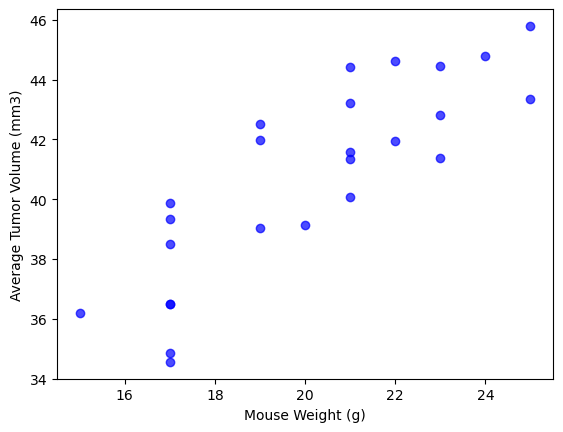

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group by "Mouse ID" to calculate the average tumor volume for each mouse in the Capomulin regimen
capomulin_data = mouse_study_df[mouse_study_df["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weights for the Capomulin regimen
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create the scatter plot
plt.scatter(mouse_weights, average_tumor_volume, color='b', marker='o', alpha=0.7)

# Add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

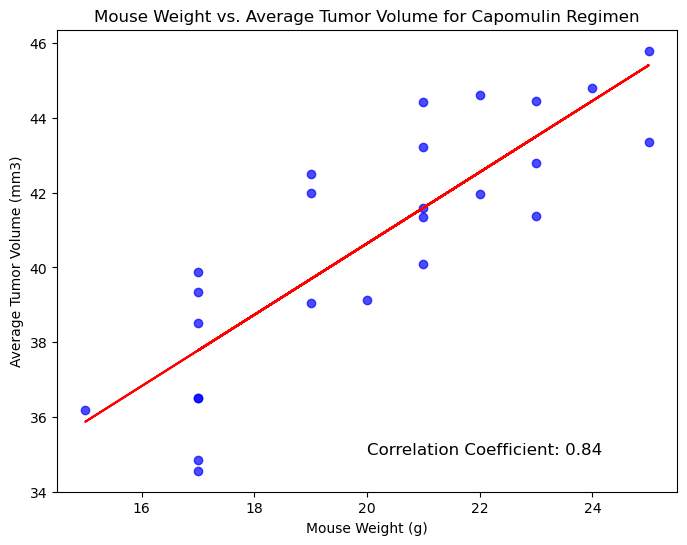

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter the dataframe to only include data for the "Capomulin" regimen
capomulin_data = mouse_study_df[mouse_study_df["Drug Regimen"] == "Capomulin"]

# Group by "Mouse ID" to calculate the average tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Group by "Mouse ID" again to get the corresponding mouse weights for the Capomulin regimen
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient = stats.pearsonr(mouse_weights, average_tumor_volume)[0]

# Perform linear regression to create a linear model between mouse weight and average tumor volume
slope, intercept, r_value, p_value, std_err = stats.linregress(mouse_weights, average_tumor_volume)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(mouse_weights, average_tumor_volume, color='b', marker='o', alpha=0.7)

# Add the linear regression line to the plot
plt.plot(mouse_weights, slope * mouse_weights + intercept, color='r')

# Add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin Regimen")

# Display the correlation coefficient on the plot
plt.text(20, 35, f"Correlation Coefficient: {correlation_coefficient:.2f}", fontsize=12)

plt.show()